In [ ]:
from google.colab import drive
drive.mount("/content/gdrive")

Mounted at /content/gdrive


In [ ]:
TRAIN_PATH = "/content/gdrive/MyDrive/Neha Singh/Projects/ML/Covid_Dataset/CovidDataset/Train"
VAL_PATH = "/content/gdrive/MyDrive/Neha Singh/Projects/ML/Covid_Dataset/CovidDataset/Val"

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import keras
from keras.layers import *
from keras.models import * 
from keras.preprocessing.image import ImageDataGenerator, load_img, img_to_array

In [ ]:
# CNN Based Model in Keras

model = Sequential()
model.add(Conv2D(32,kernel_size=(3,3),activation='relu',input_shape=(224,224,3)))
model.add(Conv2D(64,(3,3),activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))

model.add(Conv2D(64,(3,3),activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))

model.add(Conv2D(128,(3,3),activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))

model.add(Flatten())
model.add(Dense(64,activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(1,activation='sigmoid'))

model.compile(loss=keras.losses.binary_crossentropy,optimizer='adam',metrics=['accuracy'])

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 222, 222, 32)      896       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 220, 220, 64)      18496     
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 110, 110, 64)      0         
_________________________________________________________________
dropout (Dropout)            (None, 110, 110, 64)      0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 108, 108, 64)      36928     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 54, 54, 64)        0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 54, 54, 64)        0

In [ ]:
# Train from scratch
train_datagen = image.ImageDataGenerator(
    rescale = 1./255,
    shear_range = 0.2,
    zoom_range = 0.2,
    horizontal_flip = True,
)

test_dataset = image.ImageDataGenerator(rescale=1./255)

In [ ]:
train_generator = train_datagen.flow_from_directory(
    '/content/gdrive/MyDrive/Neha Singh/Projects/ML/Covid_Dataset/CovidDataset/Train',
    target_size = (224,224),
    batch_size = 32,
    class_mode = 'binary')


Found 252 images belonging to 2 classes.


In [ ]:
train_generator.class_indices

{'Covid': 0, 'Normal': 1}

In [ ]:
validation_generator = test_dataset.flow_from_directory(
    '/content/gdrive/MyDrive/Neha Singh/Projects/ML/Covid_Dataset/CovidDataset/Val',
    target_size = (224,224),
    batch_size = 32,
    class_mode = 'binary')

Found 84 images belonging to 2 classes.


In [ ]:
hist = model.fit(
    train_generator,
    steps_per_epoch=len(train_generator),
    epochs = 10,  
    validation_data = validation_generator,
    validation_steps=len(validation_generator)
)

Epoch 1/10
8/8 [==============================] - 132s 13s/step - loss: 1.8388 - accuracy: 0.5460 - val_loss: 0.6829 - val_accuracy: 0.6429
Epoch 2/10
8/8 [==============================] - 10s 1s/step - loss: 0.6821 - accuracy: 0.5533 - val_loss: 0.6804 - val_accuracy: 0.7738
Epoch 3/10
8/8 [==============================] - 10s 1s/step - loss: 0.6545 - accuracy: 0.6039 - val_loss: 0.5653 - val_accuracy: 0.6667
Epoch 4/10
8/8 [==============================] - 10s 1s/step - loss: 0.5332 - accuracy: 0.7562 - val_loss: 0.4296 - val_accuracy: 0.7738
Epoch 5/10
8/8 [==============================] - 10s 1s/step - loss: 0.3982 - accuracy: 0.7973 - val_loss: 0.3740 - val_accuracy: 0.9762
Epoch 6/10
8/8 [==============================] - 10s 1s/step - loss: 0.4011 - accuracy: 0.8677 - val_loss: 0.3391 - val_accuracy: 0.9405
Epoch 7/10
8/8 [==============================] - 10s 1s/step - loss: 0.3524 - accuracy: 0.8697 - val_loss: 0.2041 - val_accuracy: 0.9405
Epoch 8/10
8/8 [================

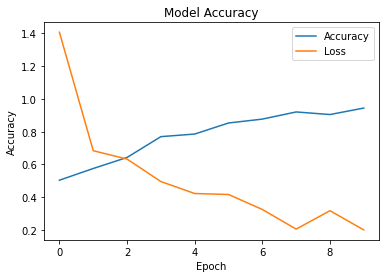

In [ ]:
import matplotlib.pyplot as plt
plt.plot(hist.history["accuracy"])
plt.plot(hist.history["loss"])
plt.title("Model Accuracy")
plt.ylabel("Accuracy")
plt.xlabel("Epoch")
plt.legend(["Accuracy", "Loss"])
plt.show()

In [ ]:
import numpy as np
testing = load_img('/content/gdrive/MyDrive/Neha Singh/Projects/ML/Covid_Dataset/CovidDataset/Val/Covid/E63574A7-4188-4C8D-8D17-9D67A18A1AFA.jpeg', target_size=(224,224))
testing
x = img_to_array(testing)
x = x/255
x = np.expand_dims(x, axis=0)

model.predict_classes(x)

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


array([[0]], dtype=int32)

In [ ]:
model.save('/content/gdrive/MyDrive/Neha Singh/Projects/ML/Covid_Dataset/Model/model.h5')

In [ ]:
from keras.models import load_model
saved_model = load_model('/content/gdrive/MyDrive/Neha Singh/Projects/ML/Covid_Dataset/Model/model.h5')

In [ ]:
import numpy as np
testing = load_img('/content/gdrive/MyDrive/Neha Singh/Projects/ML/Covid_Dataset/CovidDataset/Val/Normal/NORMAL2-IM-0395-0001.jpeg', target_size=(224,224))
testing
x = img_to_array(testing)
x = x/255
x = np.expand_dims(x, axis=0)

saved_model.predict_classes(x)

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


array([[1]], dtype=int32)

VGG 16

In [ ]:
VGG = keras.applications.VGG16(input_shape=(224,224,3), include_top=False, weights='imagenet')
VGG.trainable = False

58892288/58889256 [==============================] - 0s 0us/step


In [ ]:
model_vgg = keras.Sequential(
    [
     VGG,
     keras.layers.Flatten(),
     keras.layers.Dense(units=256,activation="relu"),
     keras.layers.Dense(units=256,activation="relu"),
     keras.layers.Dense(units=2,activation="softmax")
    ]
)

model_vgg.compile(optimizer='adam', loss=keras.losses.categorical_crossentropy, metrics=['accuracy'])

In [ ]:
model_vgg.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
vgg16 (Functional)           (None, 7, 7, 512)         14714688  
_________________________________________________________________
flatten_3 (Flatten)          (None, 25088)             0         
_________________________________________________________________
dense_8 (Dense)              (None, 256)               6422784   
_________________________________________________________________
dense_9 (Dense)              (None, 256)               65792     
_________________________________________________________________
dense_10 (Dense)             (None, 2)                 514       
Total params: 21,203,778
Trainable params: 6,489,090
Non-trainable params: 14,714,688
_________________________________________________________________


In [ ]:
trData_vgg = ImageDataGenerator()
trainData_vgg = trData_vgg.flow_from_directory('/content/gdrive/MyDrive/Neha Singh/Projects/ML/Covid_Dataset/CovidDataset/Train', target_size=(224,224))

tsData_vgg = ImageDataGenerator()
testData_vgg = tsData_vgg.flow_from_directory('/content/gdrive/MyDrive/Neha Singh/Projects/ML/Covid_Dataset/CovidDataset/Val', target_size=(224,224))

Found 252 images belonging to 2 classes.
Found 84 images belonging to 2 classes.


In [ ]:
import tensorflow as tf
import keras

tf.config.run_functions_eagerly(True)

In [ ]:
hist1 = model_vgg.fit(
    trainData_vgg,
    steps_per_epoch=len(train_generator),
    epochs = 10,
    validation_data = testData_vgg,
    validation_steps = 10
)

/usr/local/lib/python3.7/dist-packages/tensorflow/python/data/ops/dataset_ops.py:3504: UserWarning: Even though the tf.config.experimental_run_functions_eagerly option is set, this option does not apply to tf.data functions. tf.data functions are still traced and executed as graphs.
  "Even though the tf.config.experimental_run_functions_eagerly "


Epoch 1/10
8/8 [==============================] - 26s 3s/step - loss: 11.9446 - accuracy: 0.9048 - val_loss: 0.0020 - val_accuracy: 1.0000
Epoch 2/10
8/8 [==============================] - 8s 908ms/step - loss: 0.6998 - accuracy: 0.9921
Epoch 3/10
8/8 [==============================] - 8s 921ms/step - loss: 0.0000e+00 - accuracy: 1.0000
Epoch 4/10
8/8 [==============================] - 8s 920ms/step - loss: 0.0000e+00 - accuracy: 1.0000
Epoch 5/10
8/8 [==============================] - 8s 887ms/step - loss: 0.0000e+00 - accuracy: 1.0000
Epoch 6/10
8/8 [==============================] - 8s 925ms/step - loss: 0.0000e+00 - accuracy: 1.0000
Epoch 7/10
8/8 [==============================] - 8s 890ms/step - loss: 0.0000e+00 - accuracy: 1.0000
Epoch 8/10
8/8 [==============================] - 8s 914ms/step - loss: 0.0000e+00 - accuracy: 1.0000
Epoch 9/10
8/8 [==============================] - 8s 918ms/step - loss: 0.0000e+00 - accuracy: 1.0000
Epoch 10/10
8/8 [==============================] 

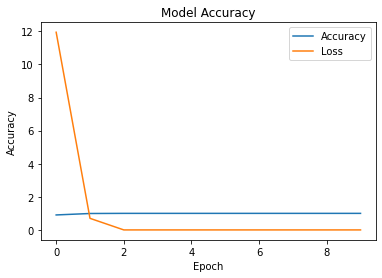

In [ ]:
import matplotlib.pyplot as plt
plt.plot(hist1.history["accuracy"])
plt.plot(hist1.history["loss"])
plt.title("Model Accuracy")
plt.ylabel("Accuracy")
plt.xlabel("Epoch")
plt.legend(["Accuracy", "Loss"])
plt.show()

In [ ]:
model_vgg.save('/content/gdrive/MyDrive/Neha Singh/Projects/ML/Covid_Dataset/Model/model_vgg.h5')

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '
/usr/local/lib/python3.7/dist-packages/tensorflow/python/data/ops/dataset_ops.py:3504: UserWarning: Even though the tf.config.experimental_run_functions_eagerly option is set, this option does not apply to tf.data functions. tf.data functions are still traced and executed as graphs.
  "Even though the tf.config.experimental_run_functions_eagerly "


array([0])

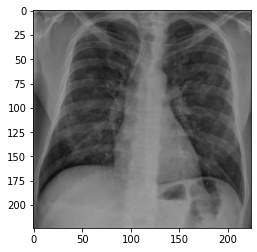

In [ ]:
from keras.preprocessing import image
img = image.load_img('/content/gdrive/MyDrive/Neha Singh/Projects/ML/Covid_Dataset/CovidDataset/Val/Covid/E63574A7-4188-4C8D-8D17-9D67A18A1AFA.jpeg', target_size=(224,224))
img = np.asarray(img)
plt.imshow(img)
img = np.expand_dims(img, axis=0)

model_vgg.predict_classes(img)

In [ ]:
#grad cam 
#saliency map